<a href="https://colab.research.google.com/github/jfsalzmann/gasprices/blob/main/final_sarimax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time

In [3]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [4]:
# Import some libraries that we will use
!pip install pmdarima 

import pandas as pd
import matplotlib.pylab as plt
from pmdarima import auto_arima 


# Then read the file as a csv

df = pd.read_csv("https://raw.githubusercontent.com/jfsalzmann/gasprices/main/data-constr/actual_sarima.csv",
                 index_col = 'date',
                 parse_dates = True).asfreq('D')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
train_y = df.iloc[:-150,]
test_y = df.iloc[-150:,]
train_X = df.iloc[:-150,]
test_X = df.iloc[-150:,]

train_data = df.iloc[:-150,]
test_data = df.iloc[-150:,]



In [5]:
! pip install pmdarima
from pmdarima.arima import auto_arima



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


(0.412535773437135, True)

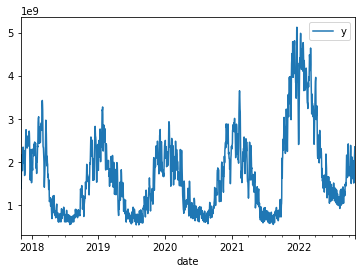

In [6]:
df.plot()

from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(df)

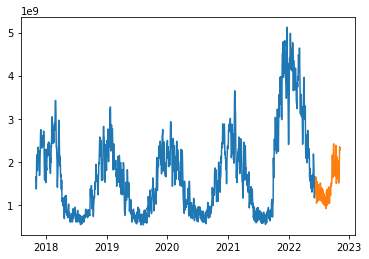

In [7]:
plt.plot(train_data)
plt.plot(test_data)

In [6]:
import pmdarima as pm

SARIMA_model = pm.auto_arima(train_data["y"], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, 
                         m=12, #12 is the frequncy of the cycle
                         start_P=0, 
                         seasonal=True, #set to seasonal
                         d=None, 
                         D=1, #order of the seasonal differencing
                         trace=False,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

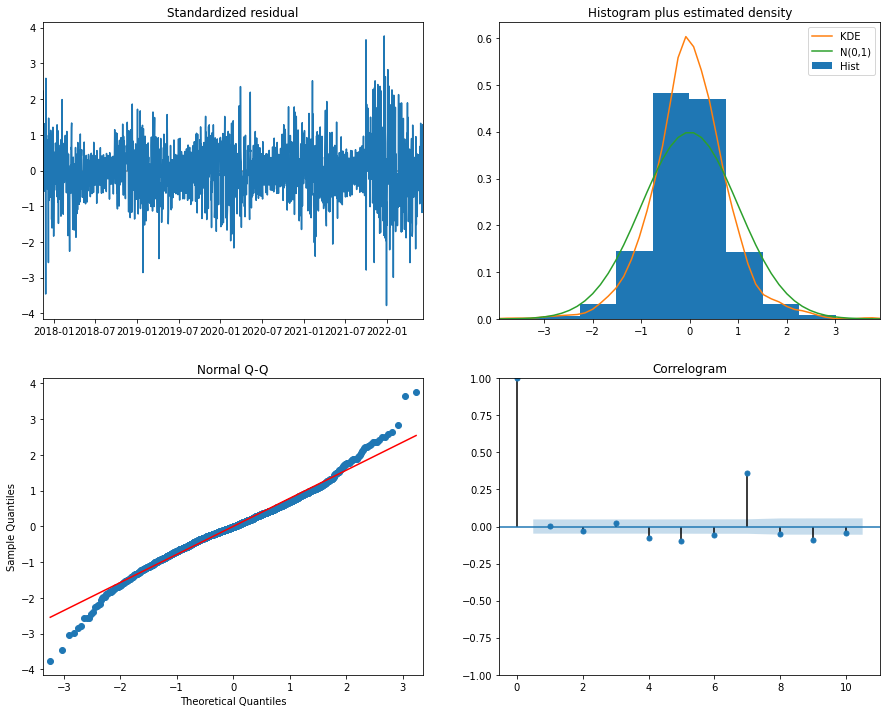

In [9]:
SARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()

In [13]:
model = SARIMA_model

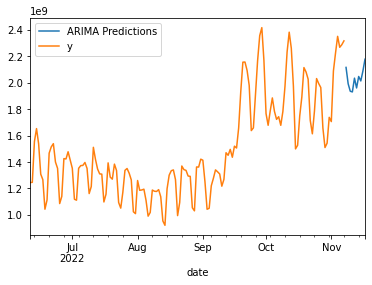

In [17]:
model_fit = SARIMA_model.fit(test_y)



start=len(train_X)
end=len(train_X)+len(test_y)-1
predictions=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test_y['y'].plot(legend=True)

